In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [10]:
train_dataset = pd.read_csv('train.csv').dropna(subset=['label_3'])
valid_dataset = pd.read_csv('valid.csv').dropna(subset=['label_3'])
test_dataset = pd.read_csv('test.csv')

# Label 3

In [11]:
label_3_train_ori_X = train_dataset.drop(columns=['label_1','label_3','label_4','label_2'])
label_3_train_ori_y = train_dataset['label_3']
label_3_valid_ori_X = valid_dataset.drop(columns=['label_1','label_3','label_4','label_2'])
label_3_valid_ori_y = valid_dataset['label_3']

## Handle class Imbalances

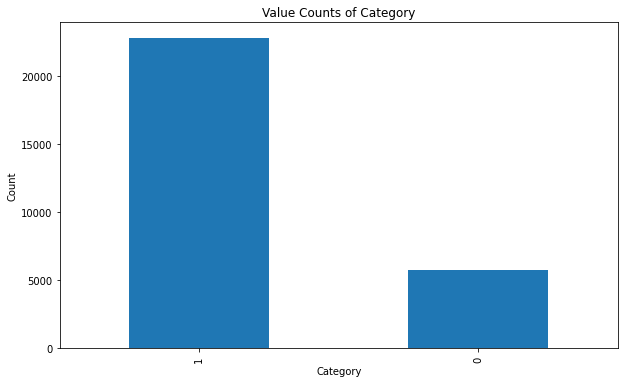

In [14]:
value_counts = label_3_train_ori_y.value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

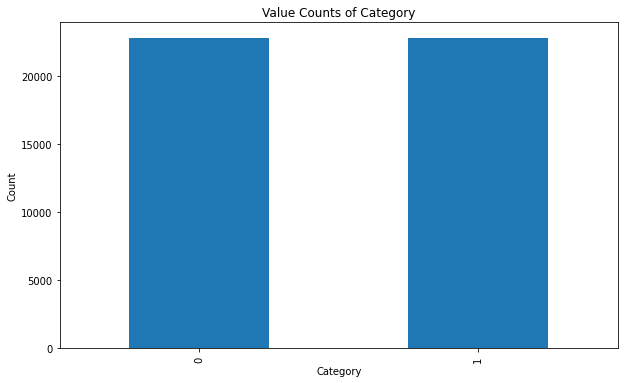

In [15]:
ros = RandomOverSampler(random_state=44)
X_resampled_label_3, y_resampled_label_3 = ros.fit_resample(label_3_train_ori_X, label_3_train_ori_y)
value_counts = y_resampled_label_3.value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Value Counts of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [16]:
scaler = StandardScaler()
X_train_scaled_label_3 = scaler.fit_transform(X_resampled_label_3)
X_valid_scaled_label_3 = scaler.transform(label_3_valid_ori_X)

## Without Tuning

In [17]:
clf = SVC(kernel='rbf')
clf.fit(X_train_scaled_label_3,y_resampled_label_3)
predictions_label_3 = clf.predict(X_valid_scaled_label_3)
initial_accuracy = accuracy_score(label_3_valid_ori_y, predictions_label_3)
print(f"Accuracy: {initial_accuracy*100:.2f}%")

Accuracy: 99.87%


In [18]:
label_3_data_to_predict = test_dataset.drop(columns=['ID'])
scaled_data_label_3 = scaler.transform(label_3_data_to_predict)
final_label_3_predict = clf.predict(scaled_data_label_3)

In [19]:
final_submission = "190601D_submission1.csv"
dataframe = pd.read_csv(final_submission)
dataframe['label_3'] = final_label_3_predict
dataframe.to_csv(final_submission,index=False)